In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['figure.figsize'] = [17, 6]
matplotlib.rcParams['axes.grid'] = True

In [158]:
%load_ext autoreload
%autoreload 2

import sys
sys.version_info

import sys
sys.path.insert(0, '../')


import numpy as np
import matplotlib.pyplot as plt

from lib_data import *

# import tensorflow as tf
# import tensorflow.compat.v1 as tf1
# tf1.disable_eager_execution()

# import nb_func2 as f
import random

# f.DIR = 'models.save3/'
# f.FILE_MODEL = 'model.ckpt-270090'
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
load_workspace(vars(), filename='25shot_may18')

Loaded: mem_vals, mem_keys, x, y, x_new, y_new, qs, qs_new, 


In [15]:
hash_planes = np.random.randn(128, 64) 

def hamming(vec, matrix):
    
    vec = np.expand_dims(vec, 0)
    vec_matrix = np.tile(vec, [np.shape(matrix)[0], 1])
    
    res = np.logical_xor(vec_matrix, matrix)
    hamming = np.sum(res, axis=1)
    
    return hamming

def get_lsh(vec, normalize=True):
    if normalize:
        vec = vec / np.linalg.norm(vec)
        
    k_hash = vec @ hash_planes.T
    return (k_hash > 0).astype(int)

In [16]:
hash_key = [get_lsh(k) for k in mem_keys]

c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


In [36]:
y_true = []
y_preds= []

for i, (qq, yy) in enumerate(zip(qs_new, y_new)): 
#     if i< episode_width * n_shot:
#         continue
        
#     v_query = f.sess.run(query, feed_dict={x_ph: xx, y_ph:yy})
#     normalized_query = qq / np.linalg.norm(qq, axis=1)

    q_hash = get_lsh(qq).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
#     similarities = normalized_query @ mem_keys.T
#     y_pred = mem_vals[similarities.argmax()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

0.95


In [19]:
from dpe import DPE

dpe = DPE('COM3')
dpe.set_clock(50)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


....

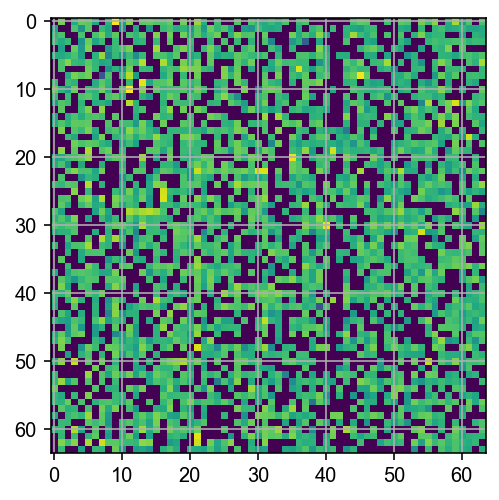

In [22]:
g = dpe.read(0, method='slow')
plt.imshow(g)

In [90]:
vec = np.random.rand(64, 1) - 0.5

vec = np.reshape(vec, -1)
vec = vec / np.linalg.norm(vec)

vec_pos = vec.copy()
vec_pos[vec_pos<0] = 0


vec_neg = vec.copy()
vec_neg[vec_neg>0] = 0

scaling = max( vec_pos.max(), -vec_neg.min())

vec_neg = -vec_neg/scaling
vec_pos =  vec_pos/scaling


Ipos = vec_pos @ g
Ineg = vec_neg @ g

Ires = Ipos - Ineg

print(Ires)

(Ires[::2] > Ires[1::2]).astype(int)

[ 2.28899952e-04  2.25225234e-04  1.08004477e-03  5.40642987e-04
  3.90461448e-04  3.73098074e-04  6.63010824e-04  1.81851223e-04
  6.29354921e-04  5.31911195e-04  6.88563790e-04  9.91622443e-04
 -6.93802216e-05  1.08694360e-03  7.48034141e-04  4.57935137e-04
  7.77609959e-04  9.66069211e-04 -2.48674086e-04  6.83870099e-04
  7.39807579e-04  2.70558986e-04  2.54823136e-04  3.38134624e-04
  5.36840460e-04  5.00210717e-04  8.57061829e-04  2.79020857e-04
 -2.08195310e-04  1.77759421e-04 -4.38263593e-04  2.12089660e-04
  7.32674689e-04  7.04109173e-04  9.27444351e-04  4.76139114e-04
  1.03967895e-04  8.55655061e-04  6.58658341e-04  8.57849669e-05
  1.01234389e-03 -1.76507512e-04  1.53121058e-04  5.43431230e-04
  1.99271712e-04  1.47639816e-03  9.76074632e-04  6.46622917e-04
  2.78983887e-04  8.92006048e-04  5.12531257e-04 -1.41933699e-04
  9.05146989e-04  6.22661765e-04  1.00776028e-03  6.91705526e-04
  6.91140842e-04  9.01628789e-04  5.50569839e-04  6.99373381e-04
  1.92491535e-04  1.00733

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [56]:
vec

array([ 0.07635314, -0.07793164,  0.19905166, -0.07183446, -0.04459316,
       -0.01999072, -0.08254988,  0.0140594 , -0.19268387,  0.07548343,
       -0.22432587,  0.05011491,  0.03896169, -0.22108267,  0.03150436,
        0.05680187, -0.14531915, -0.09702319,  0.19771083, -0.16573917,
       -0.01016515,  0.18406167,  0.20199306,  0.11875178,  0.19498786,
        0.14339736, -0.16104762,  0.01635268, -0.01371245,  0.03483289,
        0.12845566, -0.07175439, -0.07537593, -0.09685978,  0.14357618,
       -0.16484963, -0.03280088, -0.12651788,  0.06337161,  0.20428806,
       -0.03228122,  0.19608625, -0.12154611, -0.1068991 ,  0.07412896,
       -0.21035438,  0.00296286,  0.15698181,  0.19338165,  0.13424116,
       -0.18802342,  0.01456069, -0.08245912, -0.09093669,  0.17288957,
        0.0404795 ,  0.07678035, -0.15745495, -0.02341935,  0.01862528,
       -0.01233053,  0.20795563,  0.09464063, -0.05037084])

In [133]:
# g = np.random.randn(64,64) * 10e-6 + 100e-6
# plt.imshow(g); plt.colorbar()

In [134]:
g = dpe.read(0)

....

In [186]:
def get_lsh_dpe(vec, software=False):
    '''Get lsh code from a normalized vector'''
    
    # Make sure the vector is normalized
    vec = np.reshape(vec, -1)
#     vec = vec / np.linalg.norm(vec)

    vec_pos = vec.copy()
    vec_pos[vec_pos<0] = 0


    vec_neg = vec.copy()
    vec_neg[vec_neg>0] = 0

    scaling = max( vec_pos.max(), -vec_neg.min())

    vec_neg = -vec_neg/scaling
    vec_pos =  vec_pos/scaling
    
    # Software
    if software:
        Ipos = vec_pos @ g
        Ineg = vec_neg @ g
    else:
        Ipos = dpe.multiply(
                0, 
                np.expand_dims(vec_pos, 1), 
                c_sel=[0, 64], 
                r_start=0, mode=0, Tdly=500).T

        Ineg = dpe.multiply(
                0, 
                np.expand_dims(vec_neg, 1), 
                c_sel=[0, 64], 
                r_start=0, mode=0, Tdly=500).T
    
    Ires = (Ipos - Ineg).reshape(-1)
    
    h = (Ires[::2] > Ires[1::2]).astype(int)
    
    return h

c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
c:\users\localuser\.venvs\py37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


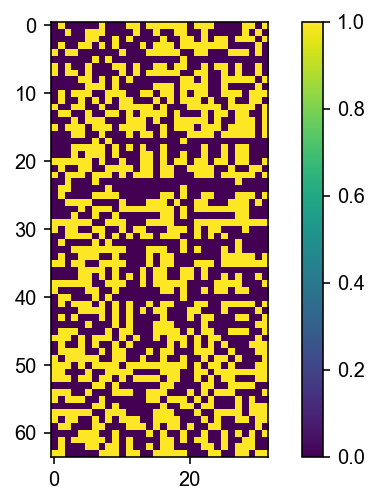

In [168]:
hash_key = [get_lsh_dpe(k) for k in tqdm(mem_keys)]

# hash_key = []

# for k in tqdm(mem_keys):
#     hash_key.append(get_lsh_dpe(k))


plt.imshow(np.array(hash_key))
plt.colorbar()
plt.grid(False)

Text(0, 0.5, 'Class')

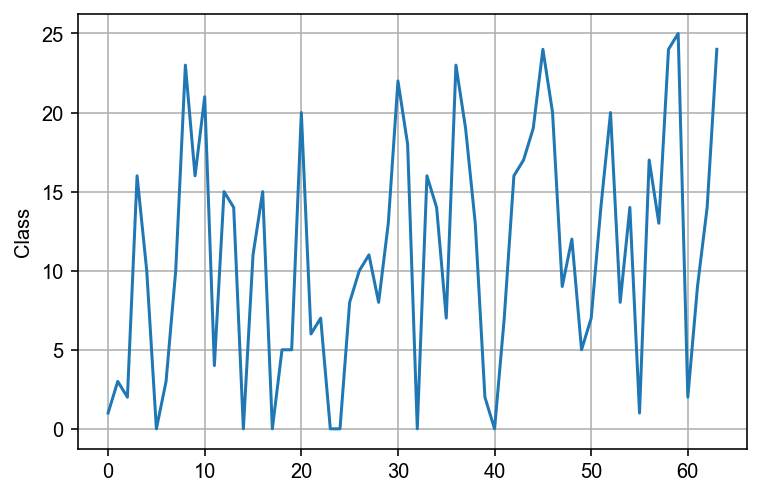

In [169]:
plt.plot(mem_vals)
plt.ylabel('Class')

In [184]:
y_true = []
y_preds= []

for i, (qq, yy) in tqdm(enumerate(zip(qs_new, y_new)), total=len(y_new)):
    if i==0:
        continue
    
    q_hash = get_lsh_dpe(qq).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
#     similarities = normalized_query @ mem_keys.T
#     y_pred = mem_vals[similarities.argmax()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))


0.9473684210526315


In [189]:
y_true = []
y_preds= []

for i, (qq, yy) in tqdm(enumerate(zip(qs, y)), total=len(y)): 
#     if i<125:
#         continue
    
    q_hash = get_lsh_dpe(qq, software=False).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
#     similarities = normalized_query @ mem_keys.T
#     y_pred = mem_vals[similarities.argmax()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))


0.734


In [176]:
15*25

375

In [173]:
y_preds

array([24, 14, 16,  1, 22, 10,  5, 18,  6,  8,  0,  7, 17,  7,  3, 12,  9,
       23, 20, 15,  2, 11, 19, 21,  4, 20, 19,  4, 19,  6,  3, 13,  2, 10,
        8, 16,  1,  7, 10, 21, 24,  6, 16, 17, 22, 15, 23, 14, 11,  3,  5,
       17, 22, 24,  8,  5, 20, 23,  1, 16, 19,  7,  6, 11, 13, 18, 21, 16,
        4, 14,  7,  3, 15, 10,  0, 16,  7, 20, 14,  0,  1,  6, 11,  3, 18,
       10,  5, 17, 13, 22, 10,  8, 15, 21,  9, 24,  4, 23, 19,  2, 22, 13,
       18,  8, 10, 15, 16,  9, 14,  4,  3, 12, 17, 24,  6,  2, 20, 11, 16,
       23,  0,  7,  1, 21,  5,  2, 10,  4, 14, 23,  0,  9,  7, 20,  2, 11,
       12, 13, 16, 21,  3,  2, 24, 22, 18, 19, 23,  1, 21,  8, 19, 15, 23,
       14,  6, 20, 10,  1,  0, 14,  2, 19, 11, 13,  8,  1,  7,  9,  2, 21,
        3, 22,  4, 16, 12,  2,  6, 22, 16, 13,  9,  1, 24, 10, 17, 20, 15,
       21,  9,  5,  4,  1,  2,  7, 23, 10, 25,  0,  3, 16,  6,  1,  4, 25,
       10,  2,  9,  3,  3, 11, 13,  5,  5,  8, 13, 16, 21, 24, 14,  2, 23,
       15, 20, 10, 16, 13

In [174]:
y_true

array([24, 14, 16,  1, 22, 10,  5, 18,  6,  8,  0, 21, 17,  7,  3, 12,  9,
       23, 20, 15,  2, 11, 19, 13,  4, 20,  5,  4, 19,  9,  0, 13,  2, 10,
        8, 16,  1,  7, 12, 21, 24,  6, 18, 17, 22, 15, 23, 14, 11,  3,  2,
       17, 22, 24,  8,  5, 20, 23,  1,  9, 19, 12,  6, 11, 13, 18, 21, 16,
        4, 14,  7,  3, 15, 10,  0, 16,  7, 20, 14,  0,  1,  6, 11,  3, 18,
       10,  5, 17, 13, 22, 12,  8, 15, 21,  9, 24,  4, 23, 19,  2, 22, 13,
       18,  8, 10, 15, 19,  9, 14,  4,  3, 12, 17, 24,  6,  2, 20, 11, 16,
       23,  0,  7,  1, 21,  5,  2, 10,  4, 14, 17,  0,  9,  7, 20,  5, 11,
       12, 13, 19,  6,  3, 15, 24, 22, 18, 16, 23,  1, 21,  8, 16, 15, 23,
       24,  6, 20, 10, 18,  0, 14,  8, 19, 11, 13,  9,  1,  7, 17,  2, 21,
        3, 22,  4,  5, 12,  2,  6, 22, 16, 13,  9, 18, 24, 10, 17, 20, 15,
       21,  8,  5,  4,  1, 14,  7, 23, 12, 11,  0,  3, 19,  6,  1,  4, 22,
       12, 23,  9,  0,  3, 11,  7, 18,  5, 17, 13, 16, 21, 24, 14,  2,  8,
       15, 20, 10, 19, 14

In [ ]:
y_true = []
y_preds= []

for i, (qq, yy) in tqdm(enumerate(zip(qs, y)), total=len(y)): 
    
    q_hash = get_lsh_dpe(qq).reshape(-1)
    
    distance  = hamming(q_hash, hash_key)
    y_pred = mem_vals[distance.argmin()]
    
#     similarities = normalized_query @ mem_keys.T
#     y_pred = mem_vals[similarities.argmax()]
    
    y_preds.append(y_pred)
    y_true.append(yy[0])
    
y_true = np.array(y_true)
y_preds= np.array(y_preds)

print(np.mean(y_true==y_preds))

In [72]:
vec = np.array([1, 1, 1, 0])

matrix = np.array([[1,1,1], 
                   [0,0,0],
                   [1,0,1],
                   [1,1,1]])

In [73]:
vec @ matrix

array([2, 1, 2])